# Iris Dataset
Using this notebook to practise code and gather idea's. Official project will be in analysis.py

Write a program called analysis.py that:  
1. Outputs a summary of each variable to a single text file,  
2. Saves a histogram of each variable to png files, and  
3. Outputs a scatter plot of each pair of variables.  
4. Performs any other analysis you think is appropriate. 

In [3]:
pip install ucimlrepo


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import ssl

# Ignore SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

from ucimlrepo import fetch_ucirepo 

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

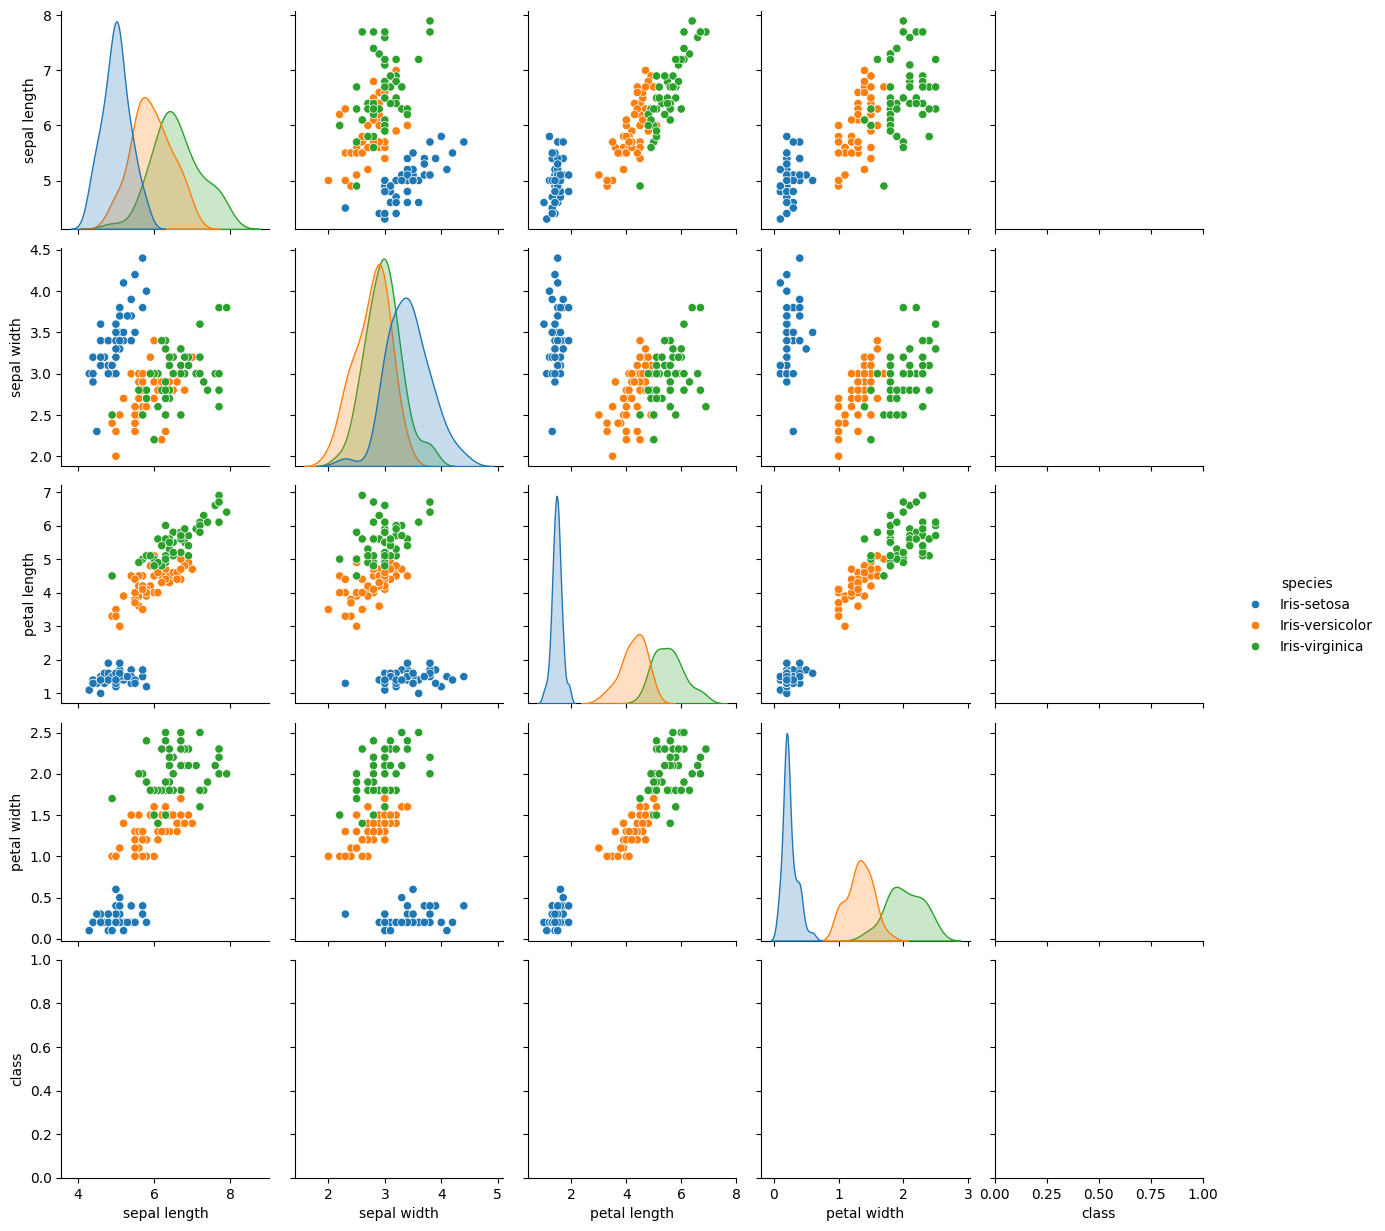

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd  # Don't forget to import pandas

# Fetch the Iris dataset
iris_dataset = fetch_ucirepo(id=53)

# Convert the dataset into a pandas DataFrame
iris_df = pd.DataFrame(iris_dataset.data.features, columns=iris_dataset.variables['name'])

# Add the target variable to the DataFrame
iris_df['species'] = iris_dataset.data.targets

# Plot pairplot
sns.pairplot(iris_df, hue='species')
plt.show()



